In [1]:
import pandas as pd
import seaborn as sns
import ppscore as pps
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression

### Carregar e preparar dados - Classificação

In [2]:
# Carregar o dataset
df = pd.read_csv('./datasets/fruit_quality.csv')

In [3]:
# Visualizar estrutura
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   int64  
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   float64
 8   Quality      4000 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 281.4+ KB


In [4]:
# Visualizar DF
df.head(5)

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,good
1,1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,good
2,2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,bad
3,3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,good
4,4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,good


In [5]:
# Ajustar Dataframe

# Remover a coluna 'A_id'
df.drop('A_id', axis=1, inplace=True)

# Transformar coluna 'Quality' em numérica
df['Quality'] = (df['Quality'] == 'good').astype(int)
df.head(5)

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,1
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,1
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,0
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,1
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,1


### Calcular PPS - Classificação

In [6]:
# Calcular PPS entre as variáveis
pps_matrix_class = pps.matrix(df)
pps_matrix_class.head(5)

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,Size,Size,1.0,predict_itself,True,None,0.000000,1.000000,None
1,Size,Weight,0.0,regression,True,mean absolute error,1.255674,1.814665,DecisionTreeRegressor()
2,Size,Sweetness,0.0,regression,True,mean absolute error,1.536197,2.078989,DecisionTreeRegressor()
3,Size,Crunchiness,0.0,regression,True,mean absolute error,1.095270,1.538555,DecisionTreeRegressor()
4,Size,Juiciness,0.0,regression,True,mean absolute error,1.542205,2.160981,DecisionTreeRegressor()


In [7]:
# Ajustar Matrix para fazer o Plot
pps_matrix_class_pivot = pps_matrix_class[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
pps_matrix_class_pivot.head(5)

x,Acidity,Crunchiness,Juiciness,Quality,Ripeness,Size,Sweetness,Weight
y,,,,,,,,
Acidity,1.0,0.000000,0.0000,0.000000,0.00000,0.000000,0.000000,0.000000
Crunchiness,0.0,1.000000,0.0000,0.000000,0.00000,0.000000,0.000000,0.000000
Juiciness,0.0,0.000000,1.0000,0.037673,0.00000,0.000000,0.000000,0.000000
Quality,0.0,0.053106,0.1002,1.000000,0.09018,0.035822,0.086172,0.043337
Ripeness,0.0,0.000000,0.0000,0.027576,1.00000,0.000000,0.000000,0.000000


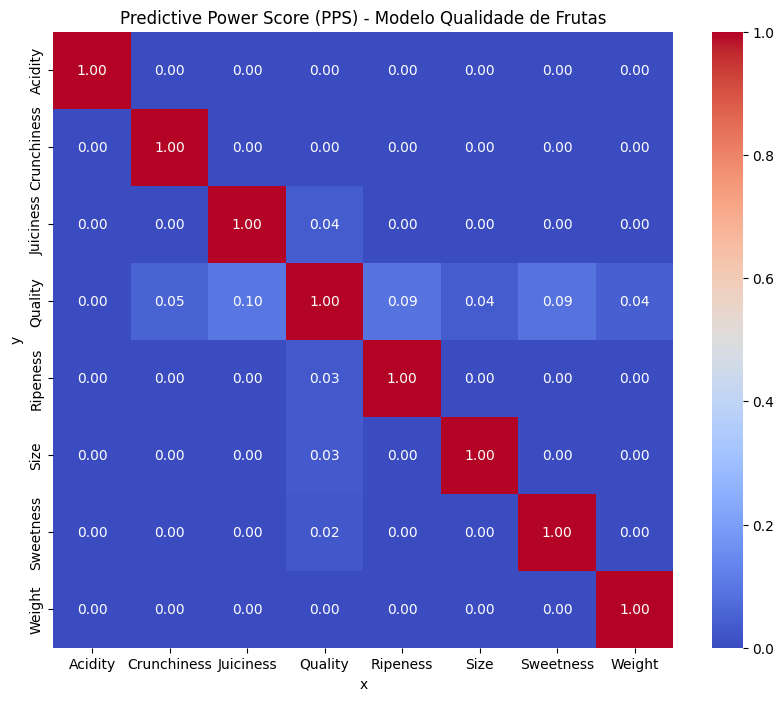

In [8]:
# Plotar a matriz do PPS
plt.figure(figsize=(10, 8))
sns.heatmap(pps_matrix_class_pivot, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Predictive Power Score (PPS) - Modelo Qualidade de Frutas')
plt.show()

In [9]:
# Calcular PPS entre 2 variáveis específicas
pps.score(df, 'Size', 'Quality')

{'x': 'Size',
 'y': 'Quality',
 'ppscore': 0.035821643286573224,
 'case': 'regression',
 'is_valid_score': True,
 'metric': 'mean absolute error',
 'baseline_score': 0.499,
 'model_score': 0.48112499999999997,
 'model': DecisionTreeRegressor()}

### Matriz de Correlação - Classificação

In [10]:
# Calcular a matriz de correlação
corr_matrix_class = df.corr()
corr_matrix_class

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
Size,1.000000,-0.170702,-0.324680,0.169868,-0.018892,-0.134773,0.196218,0.244007
Weight,-0.170702,1.000000,-0.154246,-0.095882,-0.092263,-0.243824,0.016414,0.001421
Sweetness,-0.324680,-0.154246,1.000000,-0.037552,0.095882,-0.273800,0.085999,0.250998
Crunchiness,0.169868,-0.095882,-0.037552,1.000000,-0.259607,-0.201982,0.069943,-0.012376
Juiciness,-0.018892,-0.092263,0.095882,-0.259607,1.000000,-0.097144,0.248714,0.260223
Ripeness,-0.134773,-0.243824,-0.273800,-0.201982,-0.097144,1.000000,-0.202669,-0.264315
Acidity,0.196218,0.016414,0.085999,0.069943,0.248714,-0.202669,1.000000,-0.007697
Quality,0.244007,0.001421,0.250998,-0.012376,0.260223,-0.264315,-0.007697,1.000000


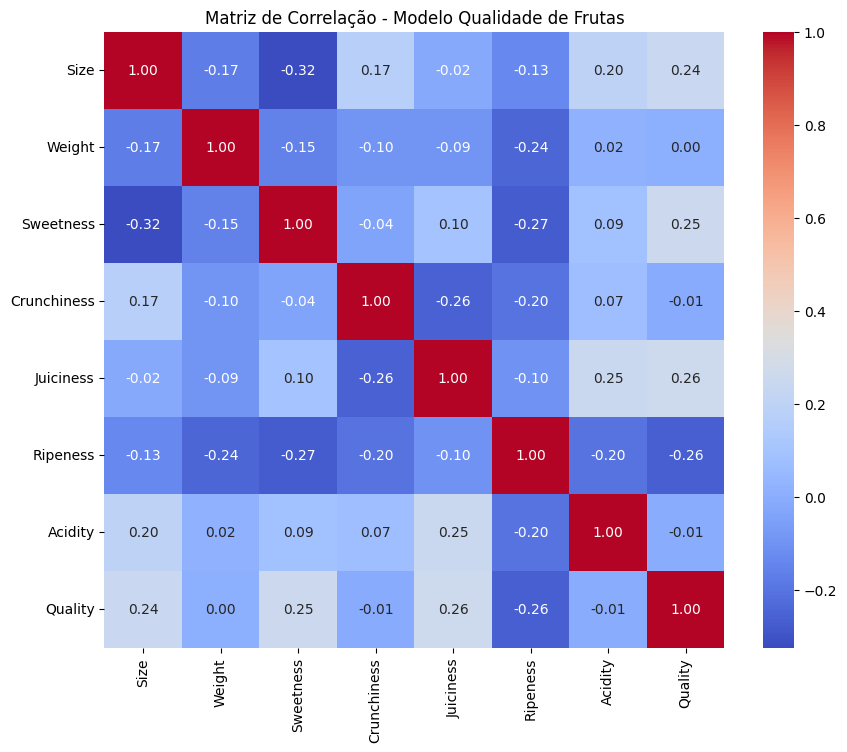

In [11]:
# Plotar a matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_class, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação - Modelo Qualidade de Frutas')
plt.show()

### Treinar Modelo Regressão Logística

In [12]:
# Separar X e y
X = df.drop('Quality', axis=1)
y=df['Quality']

In [13]:
# Treinar modelo de regressão linear múltipla
model_lr = LogisticRegression()
model_lr.fit(X, y)

LogisticRegression()

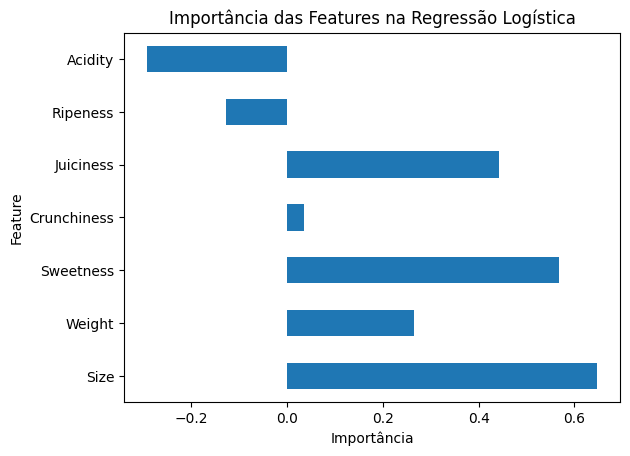

In [14]:
# Avaliar a importância das features com base nos coeficientes do modelo
feat_importance_class = pd.Series(model_lr.coef_[0], index=X.columns)
feat_importance_class.plot(kind='barh')
plt.xlabel('Importância')
plt.ylabel('Feature')
plt.title('Importância das Features na Regressão Logística')
plt.show()